In [48]:
# afegim llibreries necessaries
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns

# visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# llegim les dades del csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# carreguem dataset 
dataset = load_dataset('forestfires.csv')
data = dataset.values

In [49]:
print("Visualitzem les primeres 5 mostres de la BBDD:")
dataset.head() 

Visualitzem les primeres 5 mostres de la BBDD:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,oct,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,oct,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,mar,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,mar,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [50]:
# comprovar tipus de dades
dataset.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [51]:
# convertir dades a tipus numèric
#dataset = dataset.apply(pd.to_numeric, errors= 'coerce')
#dataset.head()

In [52]:
# comptem els valors no existents
noExist = dataset.isnull().sum()
print(noExist)

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [53]:
i = 0
while i < 517:
    if dataset['month'][i] == 'jan':
        dataset['month'][i] = 1
    elif dataset['month'][i] == 'feb':
        dataset['month'][i] = 2
    elif dataset['month'][i] == 'mar':
        dataset['month'][i] = 3
    elif dataset['month'][i] == 'apr':
        dataset['month'][i] = 4
    elif dataset['month'][i] == 'may':
        dataset['month'][i] = 5
    elif dataset['month'][i] == 'jun':
        dataset['month'][i] = 6
    elif dataset['month'][i] == 'jul':
        dataset['month'][i] = 7
    elif dataset['month'][i] == 'aug':
        dataset['month'][i] = 8
    elif dataset['month'][i] == 'sep':
        dataset['month'][i] = 9
    elif dataset['month'][i] == 'oct':
        dataset['month'][i] = 10
    elif dataset['month'][i] == 'nov':
        dataset['month'][i] = 11
    elif dataset['month'][i] == 'dec':
        dataset['month'][i] = 12
    i += 1

dataset.head()

/tmp/ipykernel_4947/1819461582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'][i] = 3
/tmp/ipykernel_4947/1819461582.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'][i] = 10
/tmp/ipykernel_4947/1819461582.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['month'][i] = 8
/tmp/ipykernel_4947/1819461582.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,fri,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,10,tue,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,10,sat,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,3,fri,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,3,sun,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [54]:
i = 0
while i < 517:
    if dataset['day'][i] == 'mon':
        dataset['day'][i] = 1
    elif dataset['day'][i] == 'tue':
        dataset['day'][i] = 2
    elif dataset['day'][i] == 'wed':
        dataset['day'][i] = 3
    elif dataset['day'][i] == 'thu':
        dataset['day'][i] = 4
    elif dataset['day'][i] == 'fri':
        dataset['day'][i] = 5
    elif dataset['day'][i] == 'sat':
        dataset['day'][i] = 6
    elif dataset['day'][i] == 'sun':
        dataset['day'][i] = 7
    i += 1
    
    
dataset["day"] = pd.to_numeric(dataset["day"])
dataset.head()

/tmp/ipykernel_4947/2035355516.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['day'][i] = 5
/tmp/ipykernel_4947/2035355516.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['day'][i] = 2
/tmp/ipykernel_4947/2035355516.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['day'][i] = 6
/tmp/ipykernel_4947/2035355516.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000


In [55]:
# canvi de object a int64 dels atributs any i dia per poder treballar comodament
dataset["day"] = pd.to_numeric(dataset["day"])
dataset["month"] = pd.to_numeric(dataset["month"])
dataset.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [94]:
def f_area(a):
    if a == 0.0:
        return 0
    else:
        return 1

dataset['damage'] = dataset['area'].apply(f_area)
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage
0,7,5,3,5,86.200,26.200,94.300,5.100,8.200,51,6.700,0.000,0.000,0
1,7,4,10,2,90.600,35.400,669.100,6.700,18.000,33,0.900,0.000,0.000,0
2,7,4,10,6,90.600,43.700,686.900,6.700,14.600,33,1.300,0.000,0.000,0
3,8,6,3,5,91.700,33.300,77.500,9.000,8.300,97,4.000,0.200,0.000,0
4,8,6,3,7,89.300,51.300,102.200,9.600,11.400,99,1.800,0.000,0.000,0


In [ ]:
#damage_level

In [ ]:
#area

In [108]:
# anàlisis estadístic
dataset.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage
count,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000,517.000
mean,4.669,4.300,7.476,4.259,90.645,110.872,547.940,9.022,18.889,44.288,4.018,0.022,12.847,0.522
std,2.314,1.230,2.276,2.073,5.520,64.046,248.066,4.559,5.807,16.317,1.792,0.296,63.656,0.500
min,1.000,2.000,1.000,1.000,18.700,1.100,7.900,0.000,2.200,15.000,0.400,0.000,0.000,0.000
25%,3.000,4.000,7.000,2.000,90.200,68.600,437.700,6.500,15.500,33.000,2.700,0.000,0.000,0.000
50%,4.000,4.000,8.000,5.000,91.600,108.300,664.200,8.400,19.300,42.000,4.000,0.000,0.520,1.000
75%,7.000,5.000,9.000,6.000,92.900,142.400,713.900,10.800,22.800,53.000,4.900,0.000,6.570,1.000
max,9.000,9.000,12.000,7.000,96.200,291.300,860.600,56.100,33.300,100.000,9.400,6.400,1090.840,1.000


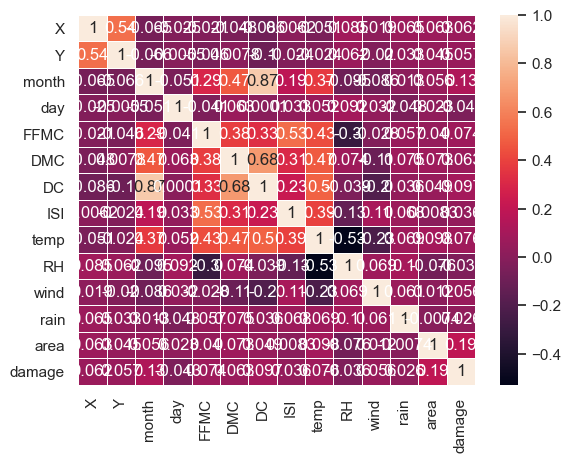

In [107]:
# mirem la correlació entre els atributs 
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True,linewidths=.5)

In [86]:
data = dataset[dataset.damage == 1]
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage
138,9,9,7,2,85.800,48.300,313.400,3.900,18.000,42,2.700,0.000,0.360,1
139,1,4,9,2,91.000,129.500,692.600,7.000,21.700,38,2.200,0.000,0.430,1
140,2,5,9,1,90.900,126.500,686.500,7.000,21.900,39,1.800,0.000,0.470,1
141,1,2,8,3,95.500,99.900,513.300,13.200,23.300,31,4.500,0.000,0.550,1
142,8,6,8,5,90.100,108.000,529.800,12.500,21.200,51,8.900,0.000,0.610,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,8,5,91.000,166.900,752.600,7.100,21.100,71,7.600,1.400,2.170,1
510,6,5,8,5,91.000,166.900,752.600,7.100,18.200,62,5.400,0.000,0.430,1
512,4,3,8,7,81.600,56.700,665.600,1.900,27.800,32,2.700,0.000,6.440,1
513,2,4,8,7,81.600,56.700,665.600,1.900,21.900,71,5.800,0.000,54.290,1


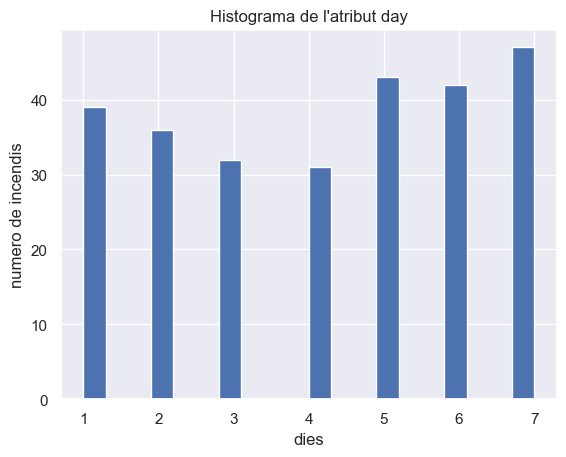

In [87]:
dataIncendis = dataset[dataset.damage == 1]
days = dataIncendis['day']
plt.figure()
plt.title("Histograma de l'atribut day")
plt.xlabel("dies")
plt.ylabel("numero de incendis")
hist = plt.hist(days,20)

#teniamos pensado quitar el atributo dias porque consideramos que no era importante teniendo ya los meses (pensabamos que cada dia tendria valores parecidos) pero cuando hemos hecho el histograma hemos visto que habia una gran diferencia entre los findes de semana y el resto de dias

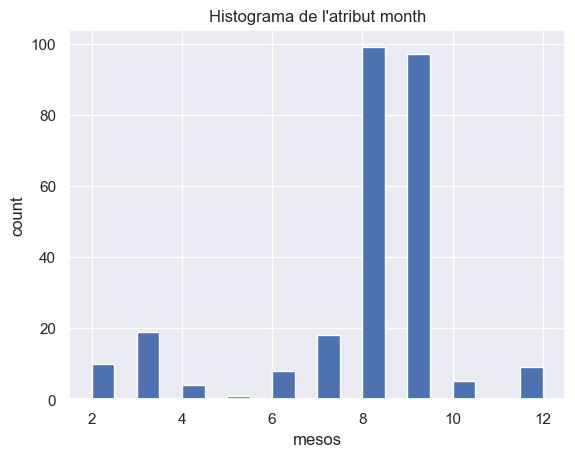

In [88]:

month = dataIncendis['month']

plt.figure()
plt.title("Histograma de l'atribut month")
plt.xlabel("mesos")
plt.ylabel("count")
hist = plt.hist(month,20)

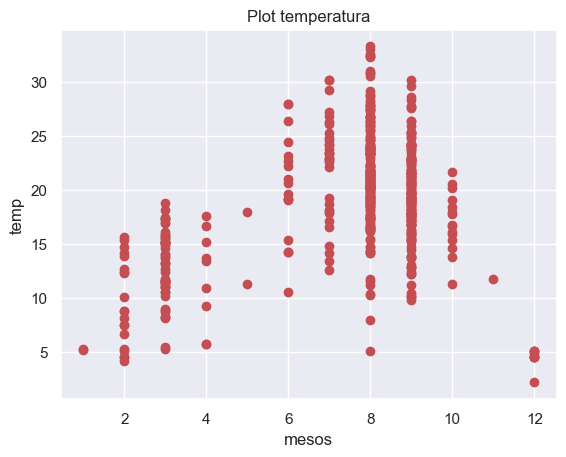

In [92]:
data = dataset.values
temp = data[:, 8]
month = data[:,2]

plt.figure()
plt.title("Plot temperatura")

plt.xlabel("mesos")
plt.ylabel("temp")

plt.plot(month,temp, 'ro')
plt.show()

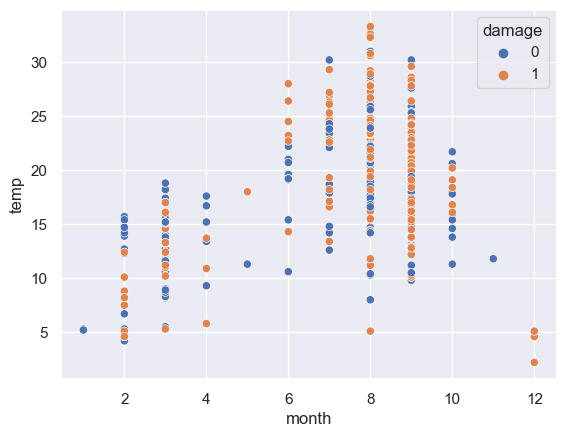

In [93]:
sns.set_theme()
sns.scatterplot(data=dataset, x='month', y='temp', hue='damage')
plt.show()

TypeError: 'tuple' object is not callable